In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data_file = "CO2Highlights.XLSX"

#Total
CO2_Fuel = pd.read_excel(data_file,header=3,sheet_name="CO2 FC")

#Coal
CO2_Fuel_Coal = pd.read_excel(data_file,header=3,sheet_name="CO2 FC - Coal")

#Oil
CO2_Fuel_Oil = pd.read_excel(data_file,header=3,sheet_name="CO2 FC - Oil")

#Gas
CO2_Fuel_Gas = pd.read_excel(data_file,header=3,sheet_name="CO2 FC - Gas")

In [3]:
#Total Fossil Fuel CO2 emissions
CO2_Fuel_df = pd.DataFrame(CO2_Fuel.loc[1,:])
CO2_Fuel_df = CO2_Fuel_df.reset_index()
CO2_Fuel_df.columns = ["Year","Total Global CO2 emissions(million tonnes)"]
CO2_Fuel_df = CO2_Fuel_df.drop([0])

#CO2 emissions from Coal
CO2_Fuel_Coal_df = pd.DataFrame(CO2_Fuel_Coal.loc[1,:])
CO2_Fuel_Coal_df = CO2_Fuel_Coal_df.reset_index()
CO2_Fuel_Coal_df.columns = ["Year","Global CO2 emissions from Coal(million tonnes)"]
CO2_Fuel_Coal_df = CO2_Fuel_Coal_df.drop([0])

#CO2 emissions from Oil
CO2_Fuel_Oil_df = pd.DataFrame(CO2_Fuel_Oil.loc[1,:])
CO2_Fuel_Oil_df = CO2_Fuel_Oil_df.reset_index()
CO2_Fuel_Oil_df.columns = ["Year","Global CO2 emissions from Oil(million tonnes)"]
CO2_Fuel_Oil_df = CO2_Fuel_Oil_df.drop([0])

#CO2 emissions from Gas
CO2_Fuel_Gas_df = pd.DataFrame(CO2_Fuel_Gas.loc[1,:])
CO2_Fuel_Gas_df = CO2_Fuel_Gas_df.reset_index()
CO2_Fuel_Gas_df.columns = ["Year","Global CO2 emissions from Gas(million tonnes)"]
CO2_Fuel_Gas_df = CO2_Fuel_Gas_df.drop([0])
CO2_Fuel_Gas_df

#Merge
CO2_Fuel_Final_df = CO2_Fuel_df.merge(CO2_Fuel_Coal_df,on="Year")
CO2_Fuel_Final_df = CO2_Fuel_Final_df.merge(CO2_Fuel_Oil_df,on="Year")
CO2_Fuel_Final_df = CO2_Fuel_Final_df.merge(CO2_Fuel_Gas_df,on="Year")
CO2_Fuel_Final_df.head()

,Year,Total Global CO2 emissions(million tonnes),Global CO2 emissions from Coal(million tonnes),Global CO2 emissions from Oil(million tonnes),Global CO2 emissions from Gas(million tonnes)
0,1971,13942.2,5229.31,6668.13,2043.62
1,1972,14616.9,5306.08,7156.82,2152.29
2,1973,15457.5,5506.31,7716.56,2233.01
3,1974,15423.8,5535.91,7598.07,2285.14
4,1975,15484.1,5647.96,7581.46,2249.44


[13942.23672, 14616.86301, 15457.51475, 15423.83391, 15484.10848, 16307.7019, 16861.12292, 17360.97745, 17880.09039, 17706.27553, 17475.95952, 17290.2511, 17398.10047, 17976.34202, 18246.53346, 18565.4129, 19192.83967, 19849.93728, 20227.83517, 20508.95054, 20621.7362, 20563.29442, 20677.2169, 20783.13078, 21365.04876, 21826.18292, 22112.28716, 22258.694, 22401.94669, 23144.31881, 23482.57318, 23888.48396, 24936.32776, 26110.84193, 27044.99777, 27902.26701, 28998.76785, 29165.5709, 28730.06014, 30434.37399, 31333.8227, 31580.91463, 32122.13168, 32324.69178, 32294.21268]


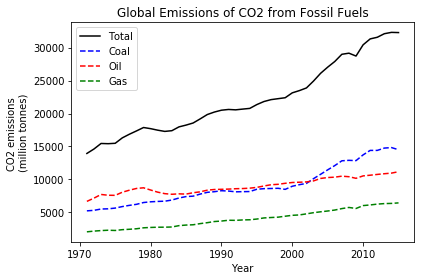

In [4]:
#Total
x_axis = CO2_Fuel_Final_df["Year"].tolist()
y_axis_Total = CO2_Fuel_Final_df["Total Global CO2 emissions(million tonnes)"].tolist()
plt.plot(x_axis,y_axis_Total,color='k',label="Total")
#Coal
y_axis_Coal = CO2_Fuel_Final_df["Global CO2 emissions from Coal(million tonnes)"].tolist()
plt.plot(x_axis,y_axis_Coal,color='b',label="Coal",linestyle="--")
#Oil
y_axis_Oil = CO2_Fuel_Final_df["Global CO2 emissions from Oil(million tonnes)"].tolist()
plt.plot(x_axis,y_axis_Oil,color='r',label="Oil",linestyle="--")
#Gas
y_axis_Gas = CO2_Fuel_Final_df["Global CO2 emissions from Gas(million tonnes)"].tolist()
plt.plot(x_axis,y_axis_Gas,color='g',label="Gas",linestyle="--")

print(y_axis_Total)
#plt.fill_between(32294.21268)

#Labels
plt.title("Global Emissions of CO2 from Fossil Fuels")
plt.xlabel("Year")
plt.ylabel("CO2 emissions \n(million tonnes)")
plt.legend()
plt.tight_layout()
plt.show()

5.932162486590599
2010


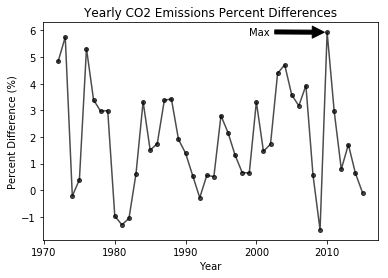

In [33]:
#Percent difference of coal emission per year
#Total
total_list = CO2_Fuel_Final_df["Total Global CO2 emissions(million tonnes)"].tolist()
x_axis_diff = x_axis[1:]
y_axis_diff_Total = [(y - x)/x*100 for x,y in zip(total_list,total_list[1:])]
print(max(y_axis_diff_Total))

#max percent
max_perc = max(y_axis_diff_Total)
max_index = y_axis_diff_Total.index(max_perc)
max_year = x_axis_diff[max_index]
print(max_year)

plt.plot(x_axis_diff,y_axis_diff_Total,'-o',color='k',alpha=0.7,markersize=4)
plt.title("Yearly CO2 Emissions Percent Differences")
plt.ylabel("Percent Difference (%)")
plt.xlabel("Year")

plt.annotate("Max",xy=(max_year,max_perc),xytext=(max_year-11,max_perc-0.1),arrowprops=dict(facecolor='black',shrink=0.05))
plt.show()